# COMP24111 - Exercise 2: News Article Classification

## 1. Task description

You will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (0), "crude" (1), "trade" (2) and "interest" (3).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

## 2. Preparation

First we need to import the data.
Run the below cell to load the data using NumPy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

### A Note on Sparsity

Most documents only contain a small subset of the vocabulary, resulting in a very sparse data matrix.
To take advantage of the sparsity, in this exercise `data` is represented as a `scipy.sparse.csr_matrix`, which can store sparse matrices efficiently while still allowing efficient row-based indexing.
You can learn more about `csr_matrix` and other ways of dealing with sparse matrices at https://docs.scipy.org/doc/scipy/reference/sparse.html.

Note, however, that `data` is **not** a normal NumPy array.
While most operations will be the same as with a normal dense array, **you cannot use a sparse matrix to index another matrix**.
If you need to do this, either first convert the matrix to a NumPy array with the `toarray()` method, or use methods specifically designed to work with sparse matrices.

In [3]:
print(data[41,:]) # A sparse row vector; the output will be the non-zero indices and their values.
print(data[41,:].toarray()) # Convert back to a NumPy array. Note that the result is a (1, 6428) matrix, not a vector.
# print(vocabulary[data[41,:] > 0]) # Can't index vocabulary with a sparse matrix.
rows, columns, values = scipy.sparse.find(data[41,:]) # Find the non-zero entries in the 42nd document.
print(vocabulary[columns]) # Prints the words present in the 42nd document.

  (0, 2)	1
  (0, 3)	3
  (0, 5)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 21)	2
  (0, 24)	1
  (0, 105)	1
  (0, 127)	1
  (0, 227)	1
  (0, 275)	1
  (0, 334)	2
  (0, 341)	1
  (0, 348)	1
  (0, 359)	1
  (0, 411)	1
  (0, 426)	1
  (0, 1428)	1
  (0, 2058)	1
  (0, 5555)	1
[[0 0 1 ... 0 0 0]]
['share' 'split' 'say' 'two-for-one' 'shareholder' 'annual' 'meeting'
 'reuter' 'ct' 'note' 'company' 'pay' 'subject' 'increase' 'stock'
 'dividend' 'april' 'northern' 'declare' 'approval' 'telecom' 'post-split'
 'nt']


To see the full vocabulary, you can run

In [4]:
print(", ".join(vocabulary))

island, telephone, share, split, approve, say, previously, announce, two-for-one, common, shareholder, annual, meeting, reuter, year, net, shr, loss, nil, vs, profit, ct, rev, mln, note, current, include, charge, discontinue, operation, dlr, ec, state, tax, majority, european, community, member, strong, reservation, import, domestically-produced, oil, fat, propose, commission, senior, diplomat, special, committee, agricultural, expert, voice, objection, measure, prepare, ground, farm, begin, monday, add, france, italy, indicate, support, proposal, lead, initially, tonne, 1987/88, price, round, complete, sale, french, unit, business, compagnie, francaise, group, investor, employee, minnesota, disclose, term, deal, plan, asset, electronic, shoe, town, end, jan, respectively, december, wisconsin, fwb, buy, bank, corp, acquire, bancshare, cash, acquisition, hold, company, total, billion, purchase, time, earning, office, paul, area, american, product, 3rd, qtr, period, feb, mth, avg, 4th, s

You can see how many times article $i$ contains word $j$ using

In [5]:
i, j = 40, 2
print(data[i,j])

4


You can see which class the $i$th article belongs to using

In [6]:
print(labels[i])

0


For instance, by running

In [7]:
print("Occurrences:", data[0,10])
print("Class:", class_names[labels[0]])
print("Word:", vocabulary[10])

Occurrences: 2
Class: earn
Word: shareholder


you can see that the 11th word appears twice in the first document, the first document belongs to the class "earn", and the 11th word is "shareholder".

The following function randomly selects a subset of the data.

In [8]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

For instance, to get one sample from the first class, two from the second, three from the third, and four from the fourth, you can run:

In [9]:
indices = sample_indices(labels, 1, 2, 3, 4)
print("Returned indices:", indices)
print("Samples:", data[indices])
print("Corresponding classes:", labels[indices])

Returned indices: [ 57 286 381 486 525 478 617 616 690 639]
Samples:   (0, 3)	2
  (0, 13)	1
  (0, 14)	1
  (0, 15)	2
  (0, 16)	4
  (0, 17)	5
  (0, 19)	7
  (0, 20)	4
  (0, 21)	4
  (0, 22)	2
  (0, 23)	4
  (0, 24)	1
  (0, 92)	1
  (0, 117)	1
  (0, 121)	1
  (0, 122)	1
  (0, 123)	1
  (0, 333)	1
  (0, 334)	1
  (0, 601)	1
  (0, 813)	1
  (0, 1214)	1
  (0, 6152)	1
  (0, 6153)	1
  (1, 5)	1
  :	:
  (8, 1507)	1
  (8, 1555)	1
  (8, 1605)	2
  (8, 1697)	6
  (8, 1705)	1
  (8, 1730)	1
  (8, 1864)	1
  (8, 1953)	1
  (8, 2326)	1
  (8, 2447)	1
  (8, 2462)	1
  (8, 2463)	2
  (8, 2487)	1
  (8, 2552)	1
  (8, 3102)	1
  (8, 4737)	1
  (8, 4904)	1
  (8, 5551)	1
  (8, 5552)	1
  (9, 332)	1
  (9, 668)	1
  (9, 822)	1
  (9, 947)	1
  (9, 984)	1
  (9, 2749)	1
Corresponding classes: [0 1 1 2 2 2 3 3 3 3]


## 3. k-NN implementation

Now, you will need to implement a k-NN classifier by filling the code below.
This function should support two types of distance measures: Euclidean distance and cosine distance.
It should take a set of training samples, a user-specified neighbour number, a distance option, and features of a set of testing samples as the input.
It should return the predicted classes for the input set of testing samples.

In order to complete this function, you will need the `sklearn.metrics.pairwise_distances` function which can handle sparse matrices, below imported as `cdist` to follow SciPy conventions (not to be confused with the `pdist` function).
You should also research NumPy functions relating to sorting.

**Your implementation must NOT make use of Python loops over individual samples or features**.
You should use functions that operate on whole matrices, as this will be much faster than looping in Python.
Each experiment below is expected to take no more than 2 minutes to run.

In [10]:
import scipy.stats as stats
from sklearn.metrics import pairwise_distances as cdist
from sklearn.metrics import accuracy_score

def knn_classify(test_samples, training_data, training_labels, metric="euclidean", k=1):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels.
    
    test_samples: An m x d matrix of m samples to classify, each with d features.
    training_data: An n x d matrix consisting of n training samples, each with d features.
    training_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    metric: The metric to use for calculating distances between samples.
    k: The number of nearest neighbours to use for classification.
    
    Returns: A vector of size m, where out[i] is the predicted class of test_samples[i].
    """
    
    # Calculate an m x n distance matrix.
    pairwise_distance = cdist(test_samples, training_data, metric);
    
    # Find the k nearest neighbours of each samples as an m x k matrix of indices.
    nearest_neighbours = np.argsort(pairwise_distance, axis=1)
    nearest_neighbours = nearest_neighbours[:, :k]
    
    # Look up the classes corresponding to each index.
    nearest_labels = training_labels[nearest_neighbours]
    
    # Return the most frequent class on each row.
    # Note: Ensure that the returned vector does not contain any empty dimensions.
    # You may find the squeeze method useful here.
    knnMode = stats.mode(nearest_labels, axis = 1).mode
    nearestLabelsSqueezed = np.squeeze(knnMode)
    
    return  nearestLabelsSqueezed

## 4. Experiments

Use your k-NN function to perform the following experiments.

### Experiment 1

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Select an appropriate neighbour number.
Train your k-NN classifier using the Euclidean distance and test it.
Repeat this process 20 times (trials).
Calculate the mean and standard deviation of the testing accuracies.

In [11]:
knnArray = np.array([])

for i in range(20):
    allIndexes = sample_indices(labels, 200, 200, 200, 200)

    trainingIndexes = sample_indices(labels, 80, 80, 80, 80)
    trainingData = data[trainingIndexes]

    testingIndexes = np.setdiff1d(allIndexes, trainingIndexes)
    testingData = data[testingIndexes]
    
    NearestNeighbourResult = knn_classify(testingData, trainingData, labels[trainingIndexes], "euclidean", 3)
    
    accuracy = accuracy_score(labels[testingIndexes], NearestNeighbourResult)
    knnArray = np.append(knnArray, accuracy)

mean = np.mean(knnArray)
stdDeviation = np.std(knnArray)

print("mean: ", mean)
print("standard deviation: ", stdDeviation)

mean:  0.8830208333333334
standard deviation:  0.0172209270906392


Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

In [12]:
knnArray = np.array([])

for i in range(20):
    allIndexes = sample_indices(labels, 200, 200, 200, 200)

    trainingIndexes = sample_indices(labels, 80, 80, 80, 80)
    trainingData = data[trainingIndexes]

    testingIndexes = np.setdiff1d(allIndexes, trainingIndexes)
    testingData = data[testingIndexes]
    
    NearestNeighbourResult = knn_classify(testingData, trainingData, labels[trainingIndexes], "cosine", 3)
    
    accuracy = accuracy_score(labels[testingIndexes], NearestNeighbourResult)
    knnArray = np.append(knnArray, accuracy)

mean = np.mean(knnArray)
stdDeviation = np.std(knnArray)

print("mean: ", mean)
print("standard deviation: ", stdDeviation)

mean:  0.9606250000000001
standard deviation:  0.008587276602302064


Which distance measure gives better performance?

### Experiment 2

Using the distance measure that you found performs better, repeat the same experiment, varying the neighbour number $k$ from 1 to 50.
This time, record the average training errors and standard deviation over 20 trials, for different values of $k$.
Do the same for testing errors.

In [13]:
knnFinalArrayErrorTesting = np.array([])
knnFinalArrayErrorTraining = np.array([])
knnFinalArrayAccuracyTesting = np.array([])
knnFinalArrayAccuracyTraining = np.array([])

for k in range(1, 51):
    knnArrayAccuracyTesting = np.array([])
    knnArrayAccuracyTraining = np.array([])
    errorArrayTesting = np.array([])
    errorArrayTraining = np.array([])
    
    for i in range(0, 20):
        allIndexes = sample_indices(labels, 200, 200, 200, 200)

        trainingIndexes = sample_indices(labels, 80, 80, 80, 80)
        trainingData = data[trainingIndexes]

        testingIndexes = np.setdiff1d(allIndexes, trainingIndexes)
        testingData = data[testingIndexes]
        
        NearestNeighbourResult_Training = knn_classify(trainingData, trainingData, labels[trainingIndexes], "cosine", k)
        NearestNeighbourResult_Testing = knn_classify(testingData, trainingData, labels[trainingIndexes], "cosine", k)
        
        accuracyTraining = accuracy_score(labels[trainingIndexes], NearestNeighbourResult_Training)
        accuracyTesting = accuracy_score(labels[testingIndexes], NearestNeighbourResult_Testing)
        
        errorTraining = 1 - accuracyTraining
        errorTesting = 1 - accuracyTesting
        
        knnArrayAccuracyTraining = np.append(knnArrayAccuracyTraining, accuracyTraining)
        errorArrayTraining = np.append(errorArrayTraining, errorTraining)
        
        knnArrayAccuracyTesting = np.append(knnArrayAccuracyTesting, accuracyTesting)
        errorArrayTesting = np.append(errorArrayTesting, errorTesting)
    
        
    #Testing - takes an average of the results from the for loop
    knnArrayAccuracyAverageTesting = np.average(knnArrayAccuracyTesting)
    knnArrayErrorAverageTesting = np.average(errorArrayTesting)
    knnFinalArrayAccuracyTesting = np.append(knnFinalArrayAccuracyTesting, knnArrayAccuracyAverageTesting)
    knnFinalArrayErrorTesting = np.append(knnFinalArrayErrorTesting, knnArrayErrorAverageTesting)
    
    #Training - takes an average of the results from the for loop
    knnArrayAccuracyAverageTraining = np.average(knnArrayAccuracyTraining)
    knnArrayErrorAverageTraining = np.average(errorArrayTraining)
    knnFinalArrayAccuracyTraining = np.append(knnFinalArrayAccuracyTraining, knnArrayAccuracyAverageTraining)
    knnFinalArrayErrorTraining = np.append(knnFinalArrayErrorTraining, knnArrayErrorAverageTraining)

    
meanTrainingErrors = np.mean(knnFinalArrayErrorTraining)
stdTrainingErrors = np.std(knnFinalArrayErrorTraining)
print("Training errors: ")
print("Mean: ", meanTrainingErrors)
print("Standard deviation: ", stdTrainingErrors)
print("\n")

meanTestingErrors = np.mean(knnFinalArrayErrorTesting)
stdTestingErrors = np.std(knnFinalArrayErrorTesting)
print("Testing errors: ")
print("Mean: ", meanTestingErrors)
print("Standard deviation: ", stdTestingErrors)
print("\n")


Training errors: 
Mean:  0.043659375
Standard deviation:  0.014478603893439624


Testing errors: 
Mean:  0.05209583333333333
Standard deviation:  0.00889406793567738




Produce an error bar plot showing the training accuracy for each $k$ here:

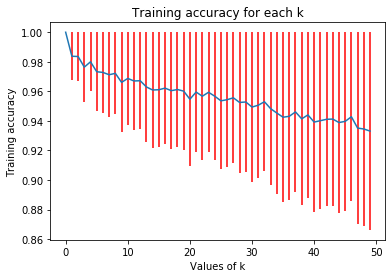

In [14]:
x = np.arange(50)
y = np.array(knnFinalArrayAccuracyTraining)
y_err = np.array(knnFinalArrayErrorTraining)  
plt.errorbar(x, y, yerr=y_err, ecolor='r')
plt.xlabel("Values of k")
plt.ylabel("Training accuracy")
plt.title("Training accuracy for each k")
plt.show()


Produce your testing error bar plot here:

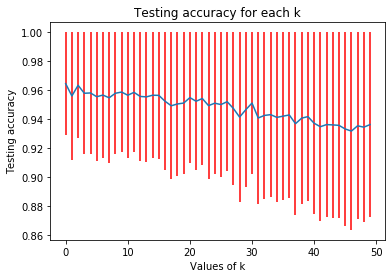

In [15]:
k = np.arange(50)
y = np.array(knnFinalArrayAccuracyTesting)
y_err = np.array(knnFinalArrayErrorTesting) 
plt.errorbar(k, y, yerr=y_err, ecolor='r')
plt.xlabel("Values of k")
plt.ylabel("Testing accuracy")
plt.title("Testing accuracy for each k")
plt.show()

**Remember that all graphs should have axis labels and a title.**

Now, answer a few questions according to what you have observed.

Q1. What is the training accuracy obtained when $k=1$? Explain it.

Q2. Do the testing and training accuracies differ, and why?

Q3. How do the accuracies change as $k$ gets bigger, and why?

### Experiment 3

Compare three 5-NN classifiers using cosine distance.
First, randomly select 100 articles per class and keep these as your testing samples.

In [17]:
testingSamplesIndices = sample_indices(labels, 100, 100, 100, 100)
testingSamplesData = data[testingSamplesIndices]

testing_sample_labels = labels[testingSamplesIndices]

Then do the following:

(1) Train the first classifier using all the remaining articles.
Compute the confusion matrix for the 4 classes using the testing samples.

In [109]:
trainingSamplesIndices = sample_indices(labels, 200, 200, 200, 200)
trainingSamplesIndices = np.setdiff1d(trainingSamplesIndices, testingSamplesIndices)

trainingSamplesData = data[trainingSamplesIndices]
training_sample_labels= labels[trainingSamplesIndices]


knnClassification = knn_classify(testingSamplesData, trainingSamplesData, labels[trainingSamplesIndices], "cosine", k=5)

def confusion_matrix(actual, pred, knnClassification):
    result = np.zeros([2, 2])
    
    for i in range(0, 100):
        # True Positive
        if (actual[i]== pred[i]):
            result[0][0] += 1
            
    TP = result[0][0]
            
    # False Negative
    FN = 100 - result[0][0]
    result[0][1] = FN
            
    # False Positive
    restClassified = knnClassification[100:400]
    FP = restClassified[restClassified == 0].size
    result[1][0] += FP
        
    # True Negative
    TN = 300 - FP
    result[1][1] += TN
            
    accuracy = (TN + TP)/400
    
    return result, accuracy


confusion_matrix1, acc1 = confusion_matrix(testing_sample_labels[:100], knnClassification[:100], knnClassification)
confusion_matrix2, acc2 = confusion_matrix(testing_sample_labels[100:200], knnClassification[100:200], knnClassification)
confusion_matrix3, acc3 = confusion_matrix(testing_sample_labels[200:300], knnClassification[200:300], knnClassification)
confusion_matrix4, acc4 = confusion_matrix(testing_sample_labels[300:400], knnClassification[300:400], knnClassification)

print("Confusion matrix 1: ")
print(confusion_matrix1)
print(acc1)

print("Confusion matrix 2: ")
print(confusion_matrix2)
print(acc2)

print("Confusion matrix 3: ")
print(confusion_matrix3)
print(acc3)

print("Confusion matrix 4: ")
print(confusion_matrix4)
print(acc4)

Confusion matrix 1: 
[[ 97.   3.]
 [  2. 298.]]
0.9875
Confusion matrix 2: 
[[ 99.   1.]
 [  2. 298.]]
0.9925
Confusion matrix 3: 
[[ 98.   2.]
 [  2. 298.]]
0.99
Confusion matrix 4: 
[[ 97.   3.]
 [  2. 298.]]
0.9875


(2) Randomly remove 95 training articles from class 1 ("crude").
Train the second classifier using the reduced training samples.
Compute the confusion matrix for the 4 classes using the testing samples.

In [110]:

# class1TrainingSamples = sample_indices(labels, 0, 95, 0, 0)

# trainingSamplesIndices = sample_indices(labels, 200, 200, 200, 200)
# trainingSamplesIndices = np.setdiff1d(trainingSamplesIndices, class1TrainingSamples)
# trainingSamplesIndices = np.setdiff1d(trainingSamplesIndices, testingSamplesIndices)

class1TrainingSamples = sample_indices(labels, 0, 95, 0, 0)
trainingSamplesIndices = sample_indices(labels, 200, 200, 200, 200)
trainingSamplesIndices = np.setdiff1d(trainingSamplesIndices, class1TrainingSamples)
trainingSamplesIndices = np.setdiff1d(trainingSamplesIndices, testingSamplesIndices)

trainingSamplesData = data[trainingSamplesIndices]
training_sample_labels= labels[trainingSamplesIndices]


knnClassification = knn_classify(testingSamplesData, trainingSamplesData, labels[trainingSamplesIndices], "cosine", k=5)


confusion_matrix1, acc1 = confusion_matrix(testing_sample_labels[:100], knnClassification[:100], knnClassification)
confusion_matrix2, acc2 = confusion_matrix(testing_sample_labels[100:200], knnClassification[100:200], knnClassification)
confusion_matrix3, acc3 = confusion_matrix(testing_sample_labels[200:300], knnClassification[200:300], knnClassification)
confusion_matrix4, acc4 = confusion_matrix(testing_sample_labels[300:400], knnClassification[300:400], knnClassification)

print("Confusion matrix 1: ")
print(confusion_matrix1)
print(acc1)

print("Confusion matrix 2: ")
print(confusion_matrix2)
print(acc2)

print("Confusion matrix 3: ")
print(confusion_matrix3)
print(acc3)

print("Confusion matrix 4: ")
print(confusion_matrix4)
print(acc4)

Confusion matrix 1: 
[[ 97.   3.]
 [  7. 293.]]
0.975
Confusion matrix 2: 
[[ 92.   8.]
 [  7. 293.]]
0.9625
Confusion matrix 3: 
[[ 98.   2.]
 [  7. 293.]]
0.9775
Confusion matrix 4: 
[[ 97.   3.]
 [  7. 293.]]
0.975


(3) Redo (2), but randomly remove 95 training articles from *all* the classes.
Train the third classifier using the new training data.
Compute the confusion matrix for the 4 classes using the testing samples.

In [111]:

class1TrainingSamples = sample_indices(labels, 95, 95, 95, 95)

trainingSamplesIndices = sample_indices(labels, 200, 200, 200, 200)
trainingSamplesIndices = np.setdiff1d(trainingSamplesIndices, class1TrainingSamples)
trainingSamplesIndices = np.setdiff1d(trainingSamplesIndices, testingSamplesIndices)

trainingSamplesData = data[trainingSamplesIndices]
training_sample_labels= labels[trainingSamplesIndices]


knnClassification = knn_classify(testingSamplesData, trainingSamplesData, labels[trainingSamplesIndices], "cosine", k=5)


confusion_matrix1, acc1 = confusion_matrix(testing_sample_labels[:100], knnClassification[:100], knnClassification)
confusion_matrix2, acc2 = confusion_matrix(testing_sample_labels[100:200], knnClassification[100:200], knnClassification)
confusion_matrix3, acc3 = confusion_matrix(testing_sample_labels[200:300], knnClassification[200:300], knnClassification)
confusion_matrix4, acc4 = confusion_matrix(testing_sample_labels[300:400], knnClassification[300:400], knnClassification)

print("Confusion matrix 1: ")
print(confusion_matrix1)
print(acc1)

print("Confusion matrix 2: ")
print(confusion_matrix2)
print(acc2)

print("Confusion matrix 3: ")
print(confusion_matrix3)
print(acc3)

print("Confusion matrix 4: ")
print(confusion_matrix4)
print(acc4)

Confusion matrix 1: 
[[ 97.   3.]
 [  4. 296.]]
0.9825
Confusion matrix 2: 
[[ 98.   2.]
 [  4. 296.]]
0.985
Confusion matrix 3: 
[[ 96.   4.]
 [  4. 296.]]
0.98
Confusion matrix 4: 
[[ 97.   3.]
 [  4. 296.]]
0.9825


Repeat the whole thing a few times.
Which of the three classifiers performs the worst?
Try to analyse why this might be.

## 5. Deliverables and Marking

By the deadline, you should submit one single Jupyter file using GitLab.
Please find the coursework submission instruction from the following link:
https://wiki.cs.manchester.ac.uk/index.php/UGHandbook19:Coursework

This exercise is worth 15 marks — marks will be allocated roughly on the basis of:
* rigorous experimentation,
* knowledge displayed when talking to the TA,
* problem solving skill,
* self-learning ability,
* how informative and well presented your graphs are,
* language and ease of reading.

You must be able to explain any code you've written in order to get full marks. During the marking session we will ask you to run all cells in your Jupyter file, so ensure that the file is runnable using the "Restart Kernel and Run All Cells" menu option.

The lab is marked out of 15:

|                          |         |
|:------------------------ |--------:|
| k-NN Implementation      | 3 marks |
| Experiment 1             | 4 marks |
| Experiment 2             | 4 marks |
| Experiment 3             | 4 marks |